rule 1 : 
IF  x IS low
    AND y IS low
THEN
    z IS high
CF = 1.00
Threshold-CF = 0.00


rule 2 :
IF  x IS low
    AND y IS high
THEN
    z IS low
CF = 1.00
Threshold-CF = 0.00


rule 3 :
IF  x IS high
    AND y IS low
THEN
    z IS low
CF = 1.00
Threshold-CF = 0.00


rule 4 :
IF  x IS high
    AND y IS high
THEN
    z IS high
CF = 1.00
Threshold-CF = 0.00



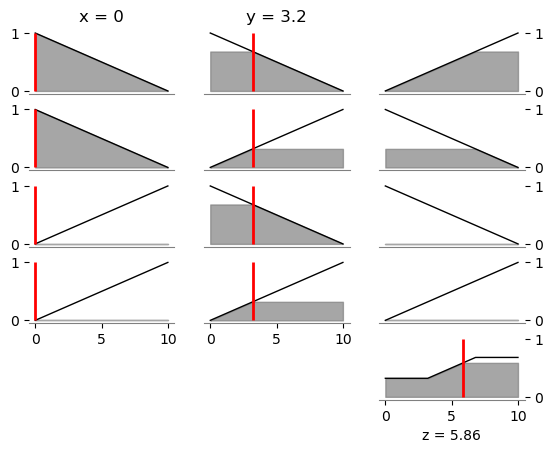

In [2]:
#import os
#os.chdir('/workspaces/fuzzy-expert')

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import numpy as np


#------------------------------------- FuzzyVariable (inpute and output) -------------------------------------
from fuzzy_expert.variable import FuzzyVariable

variables={
    'x':FuzzyVariable(
        universe_range=(0,10),
        terms={
            'high':[(0,0),(10,1)],
            'low' :[(0,1),(10,0)]
        }
    ),
    'y':FuzzyVariable(
        universe_range=(0,10),
        terms={
            'high':[(0,0),(10,1)],
            'low' :[(0,1),(10,0)]
        }
    ),
    'z':FuzzyVariable(
        universe_range=(0,10),
        terms={
            'high': [(0,0),(10,1)],
            'low' : [(0,1),(10,0)]
        }
    )
}

'''plt.figure(figsize=(10,4))
plt.subplot(131)
plt.xlabel('X')
plt.xticks([0,5,10])
variables['x'].plot()

plt.subplot(132)
plt.xlabel('Y')
plt.xticks([0,5,10])
variables['y'].plot()

plt.subplot(133)
plt.xlabel('Z')
plt.xticks([0,5,10])
variables['z'].plot()'''
#------------------------------------- FuzzyVariable (inpute and output) -------------------------------------



#----------------------------------------------- FuzzyRules --------------------------------------------------
from fuzzy_expert.rule import FuzzyRule
rules=[
    FuzzyRule(
        premise=[
            ('x','low'),
            ('AND','y','low')
        ],
        consequence=[
            ('z','high')
        ]
    ),
    FuzzyRule(
        premise=[
            ('x','low'),
            ('AND','y','high')
        ],
        consequence=[
            ('z','low')
        ]
    ),
    FuzzyRule(
        premise=[
            ('x','high'),
            ('AND','y','low')       
        ],
        consequence=[
            ('z','low')
        ]
    ),
    FuzzyRule(
        premise=[
            ('x','high'),
            ('AND','y','high')
        ],
        consequence=[
            ('z','high')
        ]
    )
]
print('rule 1 : ')
print(rules[0])
print()
print('rule 2 :')
print(rules[1])
print()
print('rule 3 :')
print(rules[2])
print()
print('rule 4 :')
print(rules[3])
#----------------------------------------------- FuzzyRules --------------------------------------------------


#-------------------------------------- specification and computations ---------------------------------------
from fuzzy_expert.inference import DecompositionalInference

model=DecompositionalInference(
    and_operator='min',
    or_operator='max',
    implication_operator='Rc',
    composition_operator='max-min',
    production_link='max',
    defuzzification_operator='cog'
)
model(
    variables=variables,
    rules=rules,
    x=0,
    y=3.2
)
#-------------------------------------- specification and computations ---------------------------------------

model.plot(
    variables=variables,
    rules=rules,
    x=0,
    y=3.2
)


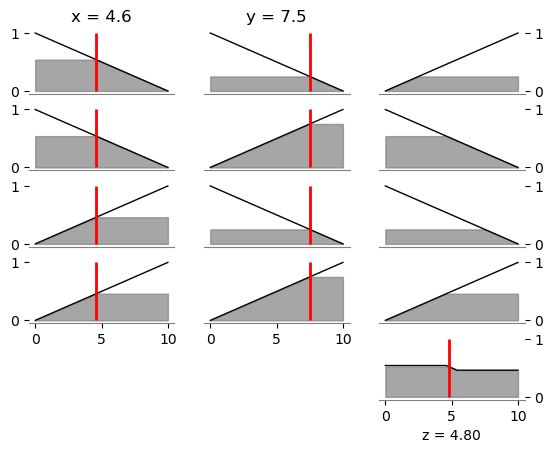

In [3]:
model(
    variables=variables,
    rules=rules,
    x=4.6,
    y=7.5
)
model.plot(
    variables=variables,
    rules=rules,
    x=4.6,
    y=7.5
)


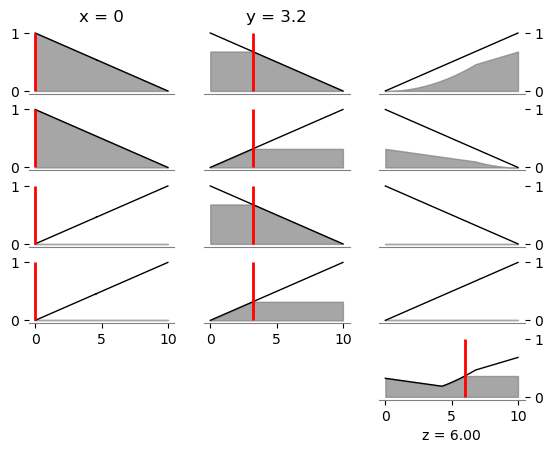

In [5]:
model=DecompositionalInference(
    and_operator='prod',
    or_operator='max',
    implication_operator='Rc',
    composition_operator='max-prod',
    production_link='max',
    defuzzification_operator='cog'
)
model(
    variables=variables,
    rules=rules,
    x=0,
    y=3.2
)
#-------------------------------------- specification and computations ---------------------------------------

model.plot(
    variables=variables,
    rules=rules,
    x=0,
    y=3.2
)


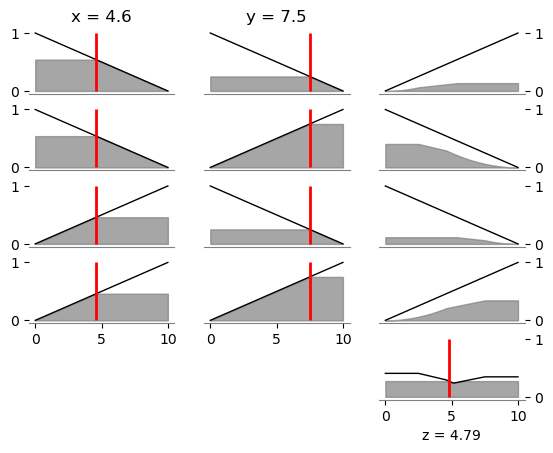

In [6]:
model=DecompositionalInference(
    and_operator='prod',
    or_operator='max',
    implication_operator='Rc',
    composition_operator='max-prod',
    production_link='max',
    defuzzification_operator='cog'
)
model(
    variables=variables,
    rules=rules,
    x=0,
    y=3.2
)
#-------------------------------------- specification and computations ---------------------------------------

model.plot(
    variables=variables,
    rules=rules,
    x=4.6,
    y=7.5
)
